The Relative Strength Index (RSI) was published
 by J. Welles Wilder. The current price is normalized as a percentage
 between 0 and 100. The name of this oscillator is misleading because
 it does not compare the instrument relative to another instrument
 or set of instruments, but rather represents the current price relative
 to other recent pieces within the selected lookback window length.

 RSI = 100 - (100 / (1 + RS))

Where:
 RS = ratio of smoothed average of n-period gains divided by the
 absolute value of the smoothed average of n-period losses.

In [1]:
import pandas as pd
import statistics as stats
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
SRC_DATA_FILENAME = 'data/EURUSD_D1.csv'
data = pd.read_csv(SRC_DATA_FILENAME)

In [3]:
close = data['Close']

In [4]:
time_period = 20 # look back period to compute gains & losses
gain_history = [] # history of gains over look back period (0 if no gain, magnitude of gain if gain)
loss_history = [] # history of losses over look back period (0 if no loss, magnitude of loss if loss)
avg_gain_values = [] # track avg gains for visualization purposes
avg_loss_values = [] # track avg losses for visualization purposes
rsi_values = [] # track computed RSI values
last_price = 0 # current_price - last_price > 0 => gain. current_price - last_price < 0 => loss.

for close_price in close:
  if last_price == 0:
    last_price = close_price

  gain_history.append(max(0, close_price - last_price))
  loss_history.append(max(0, last_price - close_price))
  last_price = close_price

  if len(gain_history) > time_period: # maximum observations is equal to lookback period
    del (gain_history[0])
    del (loss_history[0])

  avg_gain = stats.mean(gain_history) # average gain over lookback period
  avg_loss = stats.mean(loss_history) # average loss over lookback period

  avg_gain_values.append(avg_gain)
  avg_loss_values.append(avg_loss)

  rs = 0
  if avg_loss > 0: # to avoid division by 0, which is undefined
    rs = avg_gain / avg_loss

  rsi = 100 - (100 / (1 + rs))
  rsi_values.append(rsi)

data = data.assign(ClosePrice=pd.Series(close, index=data.index))
data = data.assign(RelativeStrengthAvgGainOver20Days=pd.Series(avg_gain_values, index=data.index))
data = data.assign(RelativeStrengthAvgLossOver20Days=pd.Series(avg_loss_values, index=data.index))
data = data.assign(RelativeStrengthIndicatorOver20Days=pd.Series(rsi_values, index=data.index))

close_price = data['ClosePrice']
rs_gain = data['RelativeStrengthAvgGainOver20Days']
rs_loss = data['RelativeStrengthAvgLossOver20Days']
rsi = data['RelativeStrengthIndicatorOver20Days']

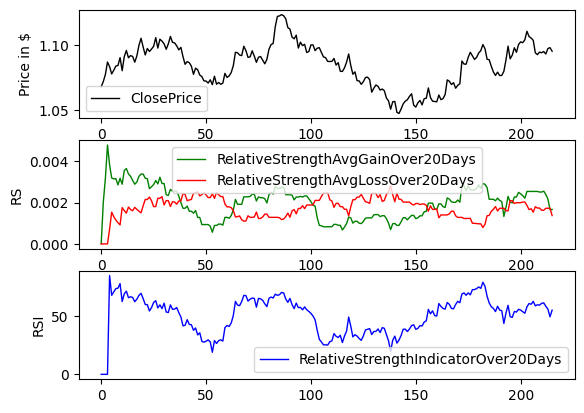

In [6]:
fig = plt.figure()
ax1 = fig.add_subplot(311, ylabel='Price in $')
close_price.plot(ax=ax1, color='black', lw=1., legend=True)
ax2 = fig.add_subplot(312, ylabel='RS')
rs_gain.plot(ax=ax2, color='g', lw=1., legend=True)
rs_loss.plot(ax=ax2, color='r', lw=1., legend=True)
ax3 = fig.add_subplot(313, ylabel='RSI')
rsi.plot(ax=ax3, color='b', lw=1., legend=True)
plt.show()